# Labeling

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
items = ['TV', '냉장고', '세탁기', '컴퓨터', '선풍기',  '선풍기', '믹서', '믹서']

In [4]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [5]:
print("인코딩 변환 결과 : ", labels)

인코딩 변환 결과 :  [0 1 4 5 3 3 2 2]


In [6]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '세탁기', '컴퓨터'], dtype='<U3')

# One-Hot Encoder

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [8]:
items_reshape = np.array(items).reshape(-1,1)
one_encoder = OneHotEncoder()
one_encoder.fit(items_reshape)
oh_labels = one_encoder.transform(items_reshape)

In [9]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

# 타이타닉

In [10]:
import pandas as pd

In [11]:
titanic_df = pd.read_csv("./data/titanic_train.csv")

In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 처리

In [13]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [15]:
titanic_df['Cabin'].fillna("N", inplace=True)

In [16]:
titanic_df['Embarked'].fillna("N", inplace=True)

In [17]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [20]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [21]:
titanic_df['Cabin'].apply(lambda x : x[0])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [22]:
titanic_df.groupby(['Sex','Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

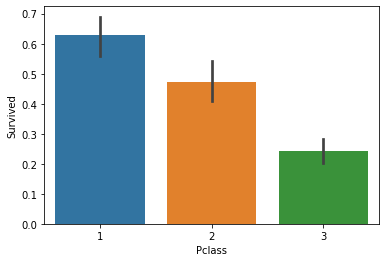

In [24]:
sns.barplot(x = 'Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

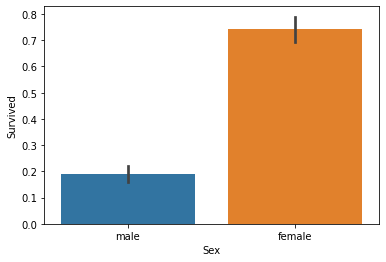

In [25]:
sns.barplot(data=titanic_df, x='Sex', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

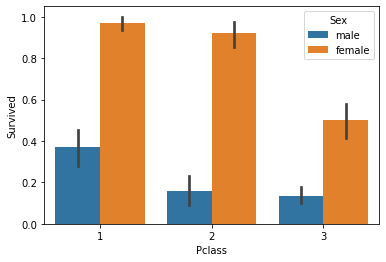

In [26]:
sns.barplot(x = 'Pclass', y = 'Survived', hue ='Sex', data = titanic_df)

In [27]:
# 방법1
ages = titanic_df['Age']
bins = [0, 5, 12, 18, 25, 35, 60,100]
labels = ['Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

cuts = pd.cut(ages, bins, right=True, labels=labels)

In [28]:
# 방법2
titanic_df['Age_cate'] = titanic_df['Age'].apply(lambda x : 'Baby' if x <=5 else 'Child' if  x<= 12 else \
                        'Teenager' if x <=18 else 'Student' if x<=25 else 'Young Adult' if x<=35 \
                        else 'Adult' if x<=60 else "Elderly")

In [29]:
# 방법3
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [30]:
titanic_df['Age_ct2'] = titanic_df['Age'].apply(get_category)

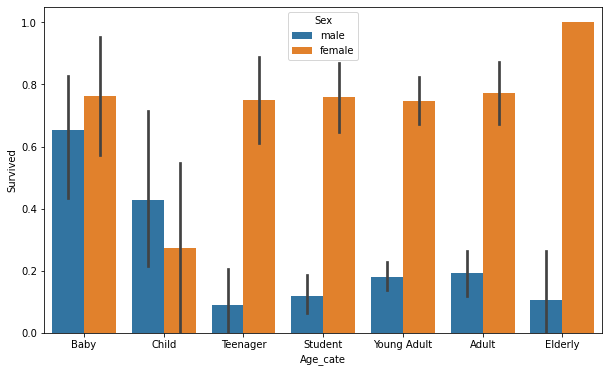

In [31]:
plt.figure(figsize=(10,6))

grp_names = ['Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

sns.barplot(x='Age_cate', y = 'Survived', hue='Sex', data=titanic_df, order=grp_names)
plt.show()

In [32]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_cate', 'Age_ct2'],
      dtype='object')

In [33]:
# 컬럼 삭제 방법 1
titanic_df.drop(['Age_cate', 'Age_ct2'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [34]:
# 컬럼 삭제 방법 2
titanic_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_cate', 'Age_ct2']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate,Age_ct2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Young Adult,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Student,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Young Adult,Young Adult


In [35]:
titanic_df = titanic_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].copy()

In [36]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

In [37]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [104]:
# Sex
encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
titanic_df['Sex'] = encoder.transform(titanic_df['Sex'])

# Cabin
encoder = LabelEncoder()
encoder.fit(titanic_df['Cabin'])
titanic_df['Cabin'] = encoder.transform(titanic_df['Cabin'])

# Embarked
encoder = LabelEncoder()
encoder.fit(titanic_df['Embarked'])
titanic_df['Embarked'] = encoder.transform(titanic_df['Embarked'])

In [105]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [38]:
for label in ['Sex', 'Cabin', 'Embarked']:
    encoder = LabelEncoder()
    encoder.fit(titanic_df[label])
    titanic_df[label] = encoder.transform(titanic_df[label])

In [41]:
titanic_df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)

In [42]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [45]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_prediction = lr.predict(X_test)
print(accuracy_score(y_test, lr_prediction))

0.8491620111731844


C:\Users\Minki_Kim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
